In [1]:
import pandas as pd
import numpy as np


In [2]:
df = pd.read_csv(r"C:\Users\shada\Downloads\retail_dataset.csv")  # replace with actual file


In [3]:
print(df.head())


  Transaction ID Customer ID Product Category  Quantity   Price        Date  \
0           T001        C015            Books       7.0   167.0  02-02-2023   
1           T002        C004             Toys       4.0   374.0  17-02-2023   
2           T003        C033        Furniture       8.0  1059.0  17-05-2024   
3           T004        C047        Groceries       5.0   304.0  11-02-2024   
4           T005        C022            Books       7.0   282.0  27-07-2024   

  Region  
0  North  
1  South  
2  South  
3  South  
4   West  


In [4]:

print(df.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction ID    100 non-null    object 
 1   Customer ID       100 non-null    object 
 2   Product Category  100 non-null    object 
 3   Quantity          98 non-null     float64
 4   Price             95 non-null     float64
 5   Date              100 non-null    object 
 6   Region            100 non-null    object 
dtypes: float64(2), object(5)
memory usage: 5.6+ KB
None


In [7]:
df["Quantity"] = df["Quantity"].fillna(df["Quantity"].mean())
df["Price"] = df["Price"].fillna(df["Price"].mean())


In [8]:
df = df.dropna(subset=["Product Category", "Region"])

In [10]:
print(df["Date"].head(20))         # show first 20 rows
print(df["Date"].unique()[:20])    # show first 20 unique values


0     02-02-2023
1     17-02-2023
2     17-05-2024
3     11-02-2024
4     27-07-2024
5     28-12-2024
6     09-04-2023
7     14-11-2024
8     26-12-2024
9     30-06-2024
10    04-09-2024
11    06-04-2024
12    04-10-2024
13    05-01-2023
14    06-08-2023
15    17-05-2024
16    02-02-2024
17    28-01-2024
18    26-07-2023
19    15-01-2023
Name: Date, dtype: object
['02-02-2023' '17-02-2023' '17-05-2024' '11-02-2024' '27-07-2024'
 '28-12-2024' '09-04-2023' '14-11-2024' '26-12-2024' '30-06-2024'
 '04-09-2024' '06-04-2024' '04-10-2024' '05-01-2023' '06-08-2023'
 '02-02-2024' '28-01-2024' '26-07-2023' '15-01-2023' '07-07-2024']


In [11]:
df["Date"] = pd.to_datetime(df["Date"], errors="coerce", dayfirst=True)


In [12]:
df = df.dropna(subset=["Date"])


In [13]:
print(df["Date"].dtypes)  # should show datetime64[ns]
print(df["Date"].head())


datetime64[ns]
0   2023-02-02
1   2023-02-17
2   2024-05-17
3   2024-02-11
4   2024-07-27
Name: Date, dtype: datetime64[ns]


In [14]:
df["Revenue"] = df["Quantity"] * df["Price"]
total_revenue = df["Revenue"].sum()
print("Total Revenue:", total_revenue)


Total Revenue: 491834.8711063373


In [15]:
category_revenue = df.groupby("Product Category")["Revenue"].sum().sort_values(ascending=False)
print(category_revenue)

print("Top 3 Categories:\n", category_revenue.head(3))
print("Bottom 3 Categories:\n", category_revenue.tail(3))


Product Category
Furniture      129664.526316
Electronics     93204.315789
Clothing        89086.000000
Toys            60512.090226
Sports          44229.000000
Books           29597.938776
Beauty          28691.000000
Groceries       16850.000000
Name: Revenue, dtype: float64
Top 3 Categories:
 Product Category
Furniture      129664.526316
Electronics     93204.315789
Clothing        89086.000000
Name: Revenue, dtype: float64
Bottom 3 Categories:
 Product Category
Books        29597.938776
Beauty       28691.000000
Groceries    16850.000000
Name: Revenue, dtype: float64


In [16]:
region_revenue = df.groupby("Region")["Revenue"].sum().sort_values(ascending=False)
print(region_revenue)

print("Highest Revenue Region:", region_revenue.idxmax())
print("Lowest Revenue Region:", region_revenue.idxmin())


Region
North    169553.563910
East     135184.044039
South    105899.736842
West      81197.526316
Name: Revenue, dtype: float64
Highest Revenue Region: North
Lowest Revenue Region: West


In [17]:
df["Year"] = df["Date"].dt.year
df["Month"] = df["Date"].dt.month

monthly_revenue = df.groupby(["Year", "Month"])["Revenue"].sum()
print(monthly_revenue)


Year  Month
2023  1        24226.000000
      2         5017.000000
      3         4184.000000
      4        37089.526316
      6        10834.000000
      7        14532.210526
      8        67718.000000
      9         8511.000000
      10       11448.000000
      11        6492.000000
      12        2653.000000
2024  1        26332.210526
      2        28011.000000
      3         6373.000000
      4        20209.000000
      5        27915.000000
      6        27101.000000
      7        33319.081633
      8         9240.000000
      9        22208.105263
      10       30649.000000
      11       26042.736842
      12       41730.000000
Name: Revenue, dtype: float64


In [18]:
customer_revenue = df.groupby("Customer ID")["Revenue"].sum().sort_values(ascending=False)
print("Top 5 Customers:\n", customer_revenue.head(5))


Top 5 Customers:
 Customer ID
C018    40557.142857
C022    37256.000000
C036    29010.000000
C010    24181.000000
C041    20347.947368
Name: Revenue, dtype: float64


In [19]:
print("Mean Revenue:", np.mean(df["Revenue"]))
print("Median Revenue:", np.median(df["Revenue"]))
print("Standard Deviation:", np.std(df["Revenue"]))


Mean Revenue: 4918.348711063373
Median Revenue: 3466.5
Standard Deviation: 4646.774020595719


In [20]:
import matplotlib.pyplot as plt

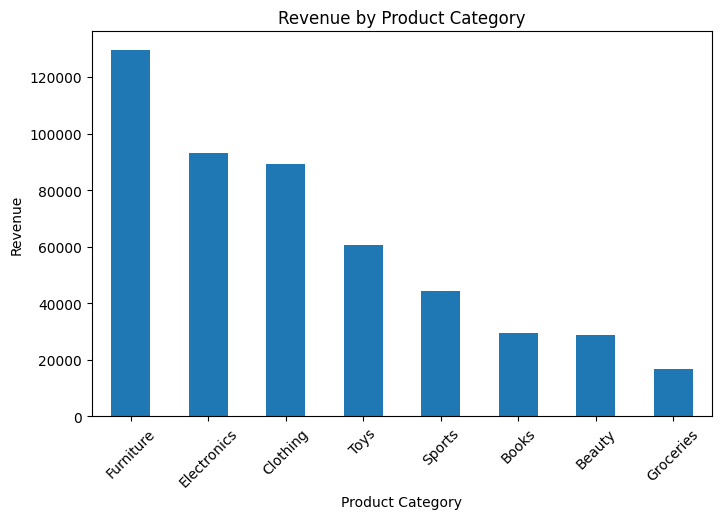

In [21]:
category_revenue.plot(kind="bar", figsize=(8,5))
plt.title("Revenue by Product Category")
plt.xlabel("Product Category")
plt.ylabel("Revenue")
plt.xticks(rotation=45)
plt.show()

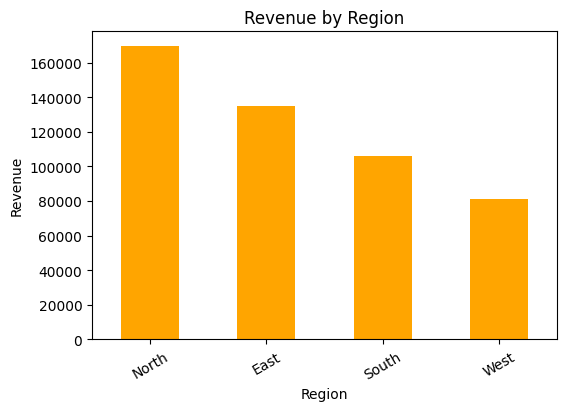

In [22]:
region_revenue.plot(kind="bar", color="orange", figsize=(6,4))
plt.title("Revenue by Region")
plt.xlabel("Region")
plt.ylabel("Revenue")
plt.xticks(rotation=30)
plt.show()

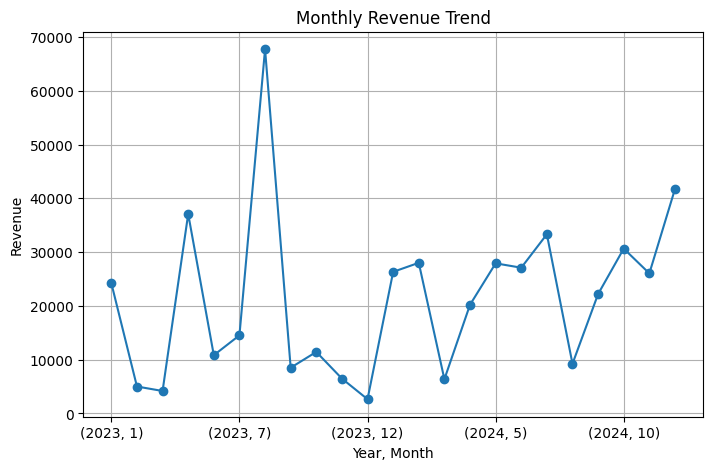

In [23]:
monthly_revenue.plot(kind="line", marker="o", figsize=(8,5))
plt.title("Monthly Revenue Trend")
plt.xlabel("Year, Month")
plt.ylabel("Revenue")
plt.grid(True)
plt.show()

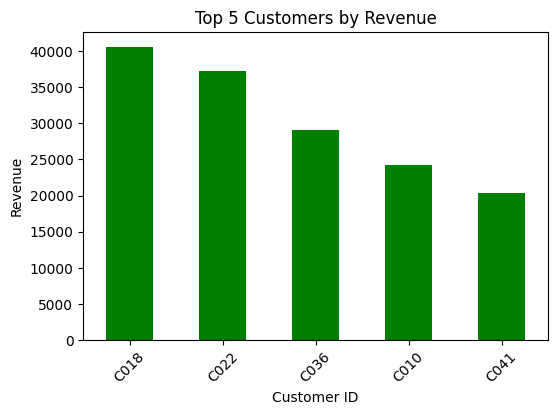

In [24]:
top_customers = customer_revenue.head(5)
top_customers.plot(kind="bar", color="green", figsize=(6,4))
plt.title("Top 5 Customers by Revenue")
plt.xlabel("Customer ID")
plt.ylabel("Revenue")
plt.xticks(rotation=45)
plt.show()